<a href="https://colab.research.google.com/github/shivanipoosala/NeuroHealth-Insight-Personalized-Prediction-Precautionary-Guidance-for-Epilepsy-Disease-Using-ML-/blob/main/Epilepsy_Prediction_Batch63_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neuro Health Insight: Personalized Prediction and Precautionary Guidance for Epilepsy Disease Using ML

#Epilepsy
Epilepsy may occur as a result of a genetic disorder or an acquired brain injury, such as a trauma or stroke. During a seizure, a person experiences abnormal behaviour, symptoms and sensations, sometimes including loss of consciousness. There are few symptoms between seizures. Epilepsy is usually treated by medication and in some cases by surgery, devices or dietary changes.

#Seizure
A seizure is a sudden surge of electrical activity in the brain. A seizure usually affects how a person appears or acts for a short time. Many different things can occur during a seizure. Whatever the brain and body can do normally can also occur during a seizure.

# Step 1: Problem Statement

Epilepsy is a neurological disorder characterized by recurrent seizures, which can significantly impact the quality of life for affected individuals. Early prediction and intervention can help manage the condition more effectively, reducing the risk of severe seizures and their associated consequences. The goal of this project is to develop a machine learning model that can predict the onset of epileptic seizures in individuals with epilepsy, allowing for timely interventions and better disease management.

# Step 2: Data Collection

By conducting survey we have collected data.
Dataset link : https://github.com/shivanipoosala/Epilepsy_Prediction_dataset

# Step 3: Exploratory Data Analysis

After data collection, several steps are carried out to explore the data. Goal of this step is to get an understanding of the data structure, conduct initial preprocessing, clean the data, identify patterns and inconsistencies in the data (i.e. skewness, outliers, missing values) and build and validate hypotheses.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOADING THE DATA SET

In [ ]:
#Importing the requried libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df=pd.read_csv("/content/drive/MyDrive/Epilepsy_Dataset.csv")

In [ ]:
#Show the dataset
df

,FirstName,LastName,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,...,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,AMGOTH,Vyshnavi,20,0,43,0,1,0,0,0,...,1,1,1,1,1,4,0,1,3,1
1,ANGIDI,Vishnu,19,1,45,0,1,1,0,1,...,1,2,1,1,1,0,0,1,2,1
2,BADAVATH,Sahasra,17,0,43,1,1,1,0,0,...,1,2,2,1,1,0,0,1,1,1
3,BANDI,Akshara,16,0,38,1,1,1,1,0,...,0,2,0,1,1,0,1,1,2,1
4,BEKKANTI,Santosh,45,1,68,1,1,1,0,1,...,1,2,0,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,NYATHARI,REDDY,18,1,50,0,1,0,0,1,...,1,0,1,1,1,2,1,1,2,1
1769,SARIGANTI,REDDY,40,1,50,0,1,0,0,0,...,1,0,0,1,1,1,0,1,0,0
1770,SHIMRANA,Jayanth,36,1,49,0,1,1,1,1,...,0,1,1,1,1,0,0,1,2,0
1771,THELLAPELLI,CHANDRA,30,1,79,1,0,0,1,1,...,1,1,1,1,1,0,0,1,1,0


In [ ]:
#Identifying variable type
df.dtypes

FirstName                           object
LastName                            object
Age                                  int64
Gender                               int64
Weight                               int64
Heredity                             int64
Diabetes                             int64
Asthma                               int64
Drug_Consumption                     int64
Alcohol_Consumption                  int64
Hormonal_Imbalance                   int64
Stress                               int64
Blood_Pressure                       int64
Fever                                int64
Lack_of_Sleep                        int64
Heart_Stroke                         int64
Brain_tumor(stage)                   int64
Brain_Injuries                       int64
Frequent_consumption_of_junkfood     int64
Seizures_time_Duration               int64
Affected                             int64
dtype: object

In [ ]:
#No.of Rows & Columns
df.shape

(1773, 21)

In [ ]:
#Index Range
df.index

RangeIndex(start=0, stop=1773, step=1)

In [ ]:
#rows*columns=size
df.size

37233

In [ ]:
#dimension of dataset
df.ndim

2

In [ ]:
#column name,size,datatype
df.info

<bound method DataFrame.info of         FirstName  LastName   Age  Gender  Weight  Heredity  Diabetes  Asthma  \
0          AMGOTH  Vyshnavi    20       0      43         0         1       0   
1          ANGIDI     Vishnu   19       1      45         0         1       1   
2        BADAVATH    Sahasra   17       0      43         1         1       1   
3           BANDI    Akshara   16       0      38         1         1       1   
4        BEKKANTI   Santosh    45       1      68         1         1       1   
...           ...        ...  ...     ...     ...       ...       ...     ...   
1768     NYATHARI      REDDY   18       1      50         0         1       0   
1769    SARIGANTI      REDDY   40       1      50         0         1       0   
1770     SHIMRANA    Jayanth   36       1      49         0         1       1   
1771  THELLAPELLI    CHANDRA   30       1      79         1         0       0   
1772      VADNALA      RAHUL   45       1      80         0         1       1

VARIABLE ANALYSIS

In [ ]:
#column names
df.columns

Index(['FirstName', 'LastName ', 'Age', 'Gender', 'Weight', 'Heredity',
       'Diabetes', 'Asthma', 'Drug_Consumption', 'Alcohol_Consumption',
       'Hormonal_Imbalance', 'Stress', 'Blood_Pressure', 'Fever',
       'Lack_of_Sleep', 'Heart_Stroke', 'Brain_tumor(stage)', 'Brain_Injuries',
       'Frequent_consumption_of_junkfood', 'Seizures_time_Duration',
       'Affected'],
      dtype='object')

In [ ]:
#count,mean,std,min,max,25%,50%,75%
df.describe(include='all')

,FirstName,LastName,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,...,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
count,1773,1773,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,...,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
unique,832,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MOHAMMAD,KUMAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.106599,0.611957,55.341794,0.611957,0.513818,0.542019,0.350818,0.403835,...,0.731528,0.917090,0.792442,0.680203,0.304569,0.860688,0.585448,0.701636,1.193457,0.608009
std,NaN,NaN,13.672129,0.487442,14.013676,0.487442,0.499950,0.498372,0.477361,0.490804,...,0.443289,0.642201,0.685063,0.466529,0.460354,1.202563,0.492783,0.457669,1.079421,0.488332
min,NaN,NaN,10.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,19.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,22.000000,1.000000,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,34.000000,1.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000


In [ ]:
#returns a random row from dataset
df.sample()

,FirstName,LastName,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,...,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
405,AKUTHOTA,KISHORE,33,1,55,1,1,1,1,1,...,1,1,2,1,1,3,1,1,3,1


In [ ]:
#count of each &every colummn
df.count()

FirstName                           1773
LastName                            1773
Age                                 1773
Gender                              1773
Weight                              1773
Heredity                            1773
Diabetes                            1773
Asthma                              1773
Drug_Consumption                    1773
Alcohol_Consumption                 1773
Hormonal_Imbalance                  1773
Stress                              1773
Blood_Pressure                      1773
Fever                               1773
Lack_of_Sleep                       1773
Heart_Stroke                        1773
Brain_tumor(stage)                  1773
Brain_Injuries                      1773
Frequent_consumption_of_junkfood    1773
Seizures_time_Duration              1773
Affected                            1773
dtype: int64

In [ ]:
#correlation value
df.corr()

<ipython-input-15-41c7a26f957c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
Age,1.000000,0.010952,0.684851,0.004686,0.099146,-0.037058,0.077189,0.228386,0.031710,0.037594,0.166253,0.096296,-0.046145,0.016896,-0.029953,0.068630,-0.203609,0.082499,0.007276
Gender,0.010952,1.000000,0.026780,0.038065,-0.005773,-0.018795,-0.001546,0.101051,-0.054693,0.039937,0.064824,-0.019941,0.007394,-0.116834,-0.017181,-0.007545,-0.015873,-0.014910,-0.044310
Weight,0.684851,0.026780,1.000000,-0.086238,-0.088795,-0.177805,-0.029745,0.292365,-0.088379,-0.026736,0.196224,0.004219,-0.137696,-0.023756,-0.109622,-0.099762,-0.230198,-0.071415,-0.145588
Heredity,0.004686,0.038065,-0.086238,1.000000,0.420320,0.387740,0.386503,0.072745,0.320563,0.303721,-0.016301,0.067938,0.277891,-0.031328,0.345769,0.330769,0.366105,0.306859,0.432224
Diabetes,0.099146,-0.005773,-0.088795,0.420320,1.000000,0.319856,0.431320,0.108337,0.402453,0.345231,-0.129134,0.196217,0.392774,0.008675,0.444837,0.329063,0.342356,0.429544,0.453294
Asthma,-0.037058,-0.018795,-0.177805,0.387740,0.319856,1.000000,0.357867,0.129002,0.437522,0.245229,-0.078152,0.098288,0.260498,0.017980,0.429264,0.439777,0.343238,0.319000,0.393512
Drug_Consumption,0.077189,-0.001546,-0.029745,0.386503,0.431320,0.357867,1.000000,0.211518,0.386496,0.221322,-0.137014,0.152034,0.314000,0.042522,0.515767,0.366693,0.293393,0.403772,0.437740
Alcohol_Consumption,0.228386,0.101051,0.292365,0.072745,0.108337,0.129002,0.211518,1.000000,-0.022719,0.166590,0.113448,0.089982,0.002402,0.007316,0.106846,0.195576,-0.036105,0.156038,0.010985
Hormonal_Imbalance,0.031710,-0.054693,-0.088379,0.320563,0.402453,0.437522,0.386496,-0.022719,1.000000,0.227393,0.008449,0.161941,0.288266,0.004656,0.317329,0.295638,0.261025,0.309403,0.346272
Stress,0.037594,0.039937,-0.026736,0.303721,0.345231,0.245229,0.221322,0.166590,0.227393,1.000000,0.042689,0.076567,0.433268,-0.058143,0.286556,0.143827,0.169619,0.277258,0.256556


In [ ]:
#no.of null values
df.isna().sum()

FirstName                           0
LastName                            0
Age                                 0
Gender                              0
Weight                              0
Heredity                            0
Diabetes                            0
Asthma                              0
Drug_Consumption                    0
Alcohol_Consumption                 0
Hormonal_Imbalance                  0
Stress                              0
Blood_Pressure                      0
Fever                               0
Lack_of_Sleep                       0
Heart_Stroke                        0
Brain_tumor(stage)                  0
Brain_Injuries                      0
Frequent_consumption_of_junkfood    0
Seizures_time_Duration              0
Affected                            0
dtype: int64

In [ ]:
#Droping FirstName &LastName Column
df = df.drop(df.columns[[0, 1]],axis = 1)

In [ ]:
df.mean()

Age                                 28.106599
Gender                               0.611957
Weight                              55.341794
Heredity                             0.611957
Diabetes                             0.513818
Asthma                               0.542019
Drug_Consumption                     0.350818
Alcohol_Consumption                  0.403835
Hormonal_Imbalance                   0.481669
Stress                               0.731528
Blood_Pressure                       0.917090
Fever                                0.792442
Lack_of_Sleep                        0.680203
Heart_Stroke                         0.304569
Brain_tumor(stage)                   0.860688
Brain_Injuries                       0.585448
Frequent_consumption_of_junkfood     0.701636
Seizures_time_Duration               1.193457
Affected                             0.608009
dtype: float64

In [ ]:
df.mode()

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,21,1,45,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1


In [ ]:
df.std()

Age                                 13.672129
Gender                               0.487442
Weight                              14.013676
Heredity                             0.487442
Diabetes                             0.499950
Asthma                               0.498372
Drug_Consumption                     0.477361
Alcohol_Consumption                  0.490804
Hormonal_Imbalance                   0.499805
Stress                               0.443289
Blood_Pressure                       0.642201
Fever                                0.685063
Lack_of_Sleep                        0.466529
Heart_Stroke                         0.460354
Brain_tumor(stage)                   1.202563
Brain_Injuries                       0.492783
Frequent_consumption_of_junkfood     0.457669
Seizures_time_Duration               1.079421
Affected                             0.488332
dtype: float64

In [ ]:
df.min()

Age                                 10
Gender                               0
Weight                              23
Heredity                             0
Diabetes                             0
Asthma                               0
Drug_Consumption                     0
Alcohol_Consumption                  0
Hormonal_Imbalance                   0
Stress                               0
Blood_Pressure                       0
Fever                                0
Lack_of_Sleep                        0
Heart_Stroke                         0
Brain_tumor(stage)                   0
Brain_Injuries                       0
Frequent_consumption_of_junkfood     0
Seizures_time_Duration               0
Affected                             0
dtype: int64

In [ ]:
df.max()

Age                                  82
Gender                                1
Weight                              100
Heredity                              1
Diabetes                              1
Asthma                                1
Drug_Consumption                      1
Alcohol_Consumption                   1
Hormonal_Imbalance                    1
Stress                                1
Blood_Pressure                        2
Fever                                 2
Lack_of_Sleep                         1
Heart_Stroke                          1
Brain_tumor(stage)                    4
Brain_Injuries                        1
Frequent_consumption_of_junkfood      1
Seizures_time_Duration                3
Affected                              1
dtype: int64

In [ ]:
df.loc[:]

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,20,0,43,0,1,0,0,0,0,1,1,1,1,1,4,0,1,3,1
1,19,1,45,0,1,1,0,1,0,1,2,1,1,1,0,0,1,2,1
2,17,0,43,1,1,1,0,0,1,1,2,2,1,1,0,0,1,1,1
3,16,0,38,1,1,1,1,0,1,0,2,0,1,1,0,1,1,2,1
4,45,1,68,1,1,1,0,1,0,1,2,0,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,18,1,50,0,1,0,0,1,0,1,0,1,1,1,2,1,1,2,1
1769,40,1,50,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0
1770,36,1,49,0,1,1,1,1,1,0,1,1,1,1,0,0,1,2,0
1771,30,1,79,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0


In [ ]:
df.iloc[:,:]

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,20,0,43,0,1,0,0,0,0,1,1,1,1,1,4,0,1,3,1
1,19,1,45,0,1,1,0,1,0,1,2,1,1,1,0,0,1,2,1
2,17,0,43,1,1,1,0,0,1,1,2,2,1,1,0,0,1,1,1
3,16,0,38,1,1,1,1,0,1,0,2,0,1,1,0,1,1,2,1
4,45,1,68,1,1,1,0,1,0,1,2,0,1,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,18,1,50,0,1,0,0,1,0,1,0,1,1,1,2,1,1,2,1
1769,40,1,50,0,1,0,0,0,1,1,0,0,1,1,1,0,1,0,0
1770,36,1,49,0,1,1,1,1,1,0,1,1,1,1,0,0,1,2,0
1771,30,1,79,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,0


In [ ]:
df.isna().all()

Age                                 False
Gender                              False
Weight                              False
Heredity                            False
Diabetes                            False
Asthma                              False
Drug_Consumption                    False
Alcohol_Consumption                 False
Hormonal_Imbalance                  False
Stress                              False
Blood_Pressure                      False
Fever                               False
Lack_of_Sleep                       False
Heart_Stroke                        False
Brain_tumor(stage)                  False
Brain_Injuries                      False
Frequent_consumption_of_junkfood    False
Seizures_time_Duration              False
Affected                            False
dtype: bool

In [ ]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: Age - Unique Values: [20 19 17 16 45 26 23 32 13 10 15 18 21 22 12 28 30 27 39 40 55 54 24 34
 43 53 59 33 35 48 25 46 60 11 37 50 36 73 56 51 82 67 62 74 47 42 65 14
 58]
Column: Gender - Unique Values: [0 1]
Column: Weight - Unique Values: [ 43  45  38  68  50  55  58  49  53  80  40  56  36  75  70  30  42  60
  57  52  62  65  90  78  37  74  59  84  73  67  54  76  66  46  23  26
  47  27  41  35  91  48  32  25  28  64  85  95  83  89 100  33  69  63
  79  86]
Column: Heredity - Unique Values: [0 1]
Column: Diabetes - Unique Values: [1 0]
Column: Asthma - Unique Values: [0 1]
Column: Drug_Consumption - Unique Values: [0 1]
Column: Alcohol_Consumption - Unique Values: [0 1]
Column: Hormonal_Imbalance - Unique Values: [0 1]
Column: Stress - Unique Values: [1 0]
Column: Blood_Pressure - Unique Values: [1 2 0]
Column: Fever - Unique Values: [1 2 0]
Column: Lack_of_Sleep - Unique Values: [1 0]
Column: Heart_Stroke - Unique Values: [1 0]
Column: Brain_tumor(stage) - Unique Valu

 **Exploratory** **Data** **Analysis** **and** **Data** **Cleaning**

Data cleaning is the process of fixing or removing incorrect,
corrupted, incorrectly formatted, duplicate, or incomplete data
within a dataset. When combining multiple data sources, there are
many opportunities for data to be duplicated or mislabeled.
If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.
There is no one absolute way to prescribe the exact steps in the data cleaning process because
the processes will vary from dataset to dataset. But it is crucial to establish a template for your data cleaning
process so you know you are doing it the right way every time.

In [ ]:
# Remove duplicate or irrelevant observations
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1768    False
1769     True
1770    False
1771     True
1772    False
Length: 1773, dtype: bool

In [ ]:
#Handle missing data
df.isna()

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1769,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Renaming Attribute name
df=df.rename(columns={"Brain_tumor(stage)": "Brain_tumor"})


## ****Step 4. Data Visualization****

(array([ 695.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1078.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

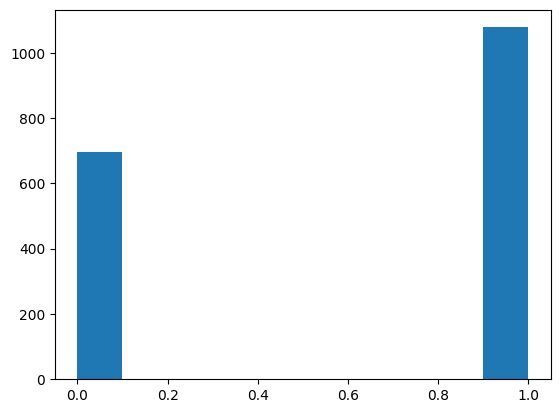

In [ ]:
plt.hist(data = df, x = 'Affected')

1    1085
0     688
Name: Gender, dtype: int64


<Axes: >

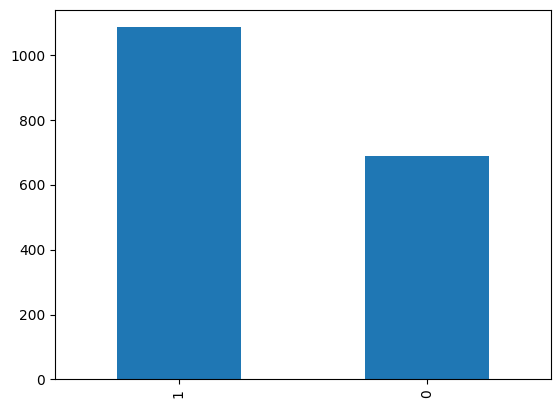

In [ ]:
# Visualize frequency count of Male/Female for given dataset using bar graph
print(df.Gender.value_counts())
df.Gender.value_counts().plot.bar()

we have observed that count of male is grater than female i.e 1085>688

1    1085
0     688
Name: Heredity, dtype: int64


<Axes: >

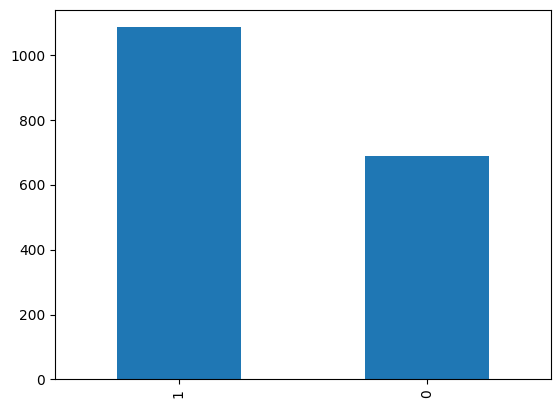

In [ ]:
# Visualize frequency count of 0/1 for given dataset using bar graph
print(df.Heredity.value_counts())
df.Heredity.value_counts().plot.bar()

Heredity — Whether Epilepsy due to Heredity or not (1, 0)

1    911
0    862
Name: Diabetes, dtype: int64


<Axes: >

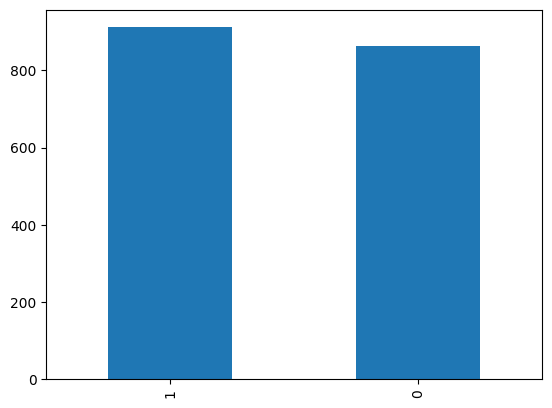

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Diabetes.value_counts())
df.Diabetes.value_counts().plot.bar()

Diabetes — Whether the patient has a Diabetes or not (1, 0)


1    961
0    812
Name: Asthma, dtype: int64


<Axes: >

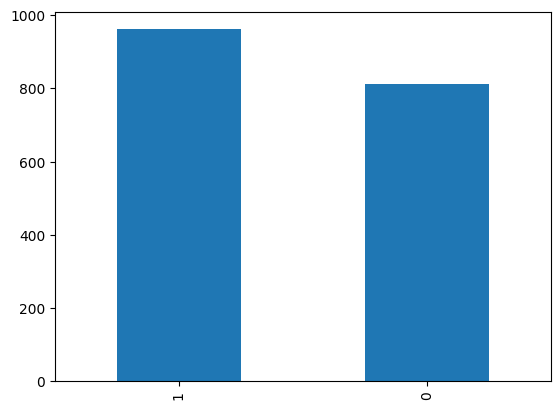

In [ ]:
# Visualize frequency count  for given dataset using bar graph
print(df.Asthma.value_counts())
df.Asthma.value_counts().plot.bar()

0    1151
1     622
Name: Drug_Consumption, dtype: int64


<Axes: >

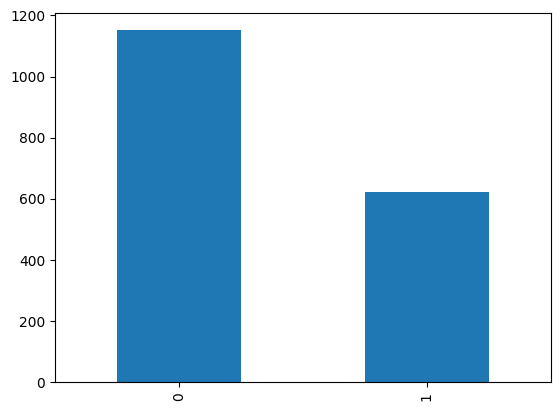

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Drug_Consumption.value_counts())
df.Drug_Consumption.value_counts().plot.bar()

0    1057
1     716
Name: Alcohol_Consumption, dtype: int64


<Axes: >

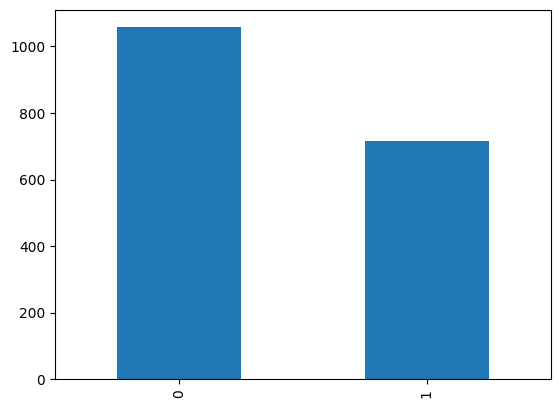

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Alcohol_Consumption.value_counts())
df.Alcohol_Consumption.value_counts().plot.bar()

0    919
1    854
Name: Hormonal_Imbalance, dtype: int64


<Axes: >

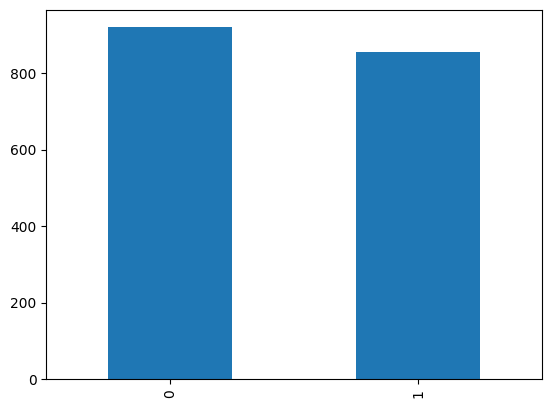

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Hormonal_Imbalance.value_counts())
df.Hormonal_Imbalance.value_counts().plot.bar()

1    1297
0     476
Name: Stress, dtype: int64


<Axes: >

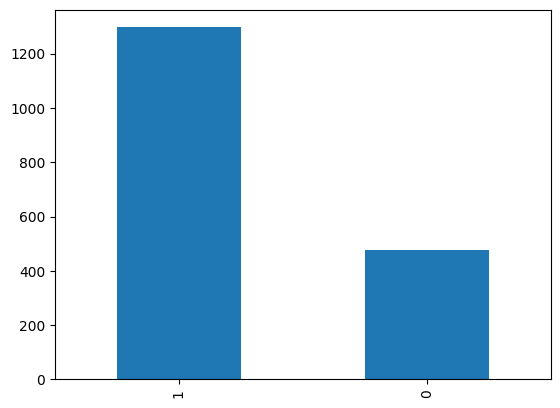

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Stress.value_counts())
df.Stress.value_counts().plot.bar()

1    1030
0     445
2     298
Name: Blood_Pressure, dtype: int64


<Axes: >

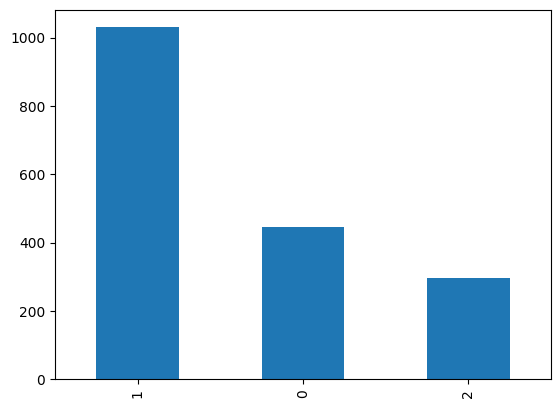

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Blood_Pressure.value_counts())
df.Blood_Pressure.value_counts().plot.bar()

1    865
0    638
2    270
Name: Fever, dtype: int64


<Axes: >

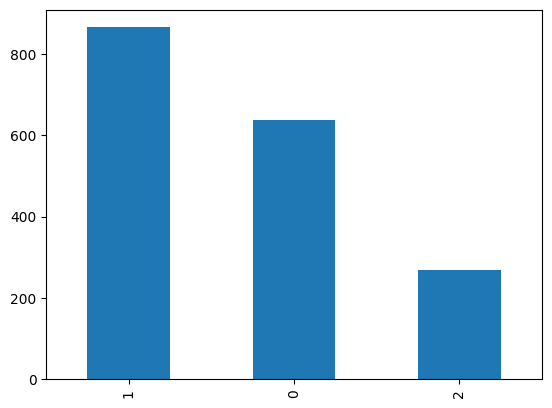

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Fever.value_counts())
df.Fever.value_counts().plot.bar()

1    1206
0     567
Name: Lack_of_Sleep, dtype: int64


<Axes: >

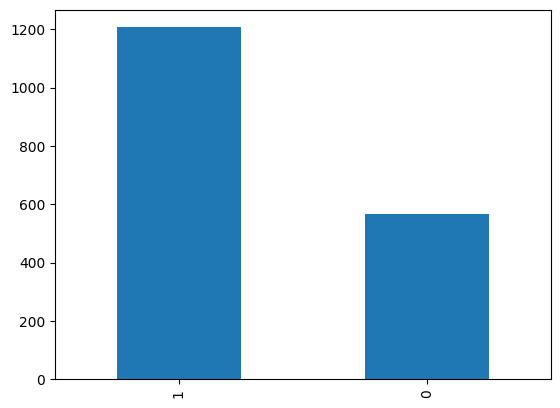

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Lack_of_Sleep.value_counts())
df.Lack_of_Sleep.value_counts().plot.bar()

0    1233
1     540
Name: Heart_Stroke, dtype: int64


<Axes: >

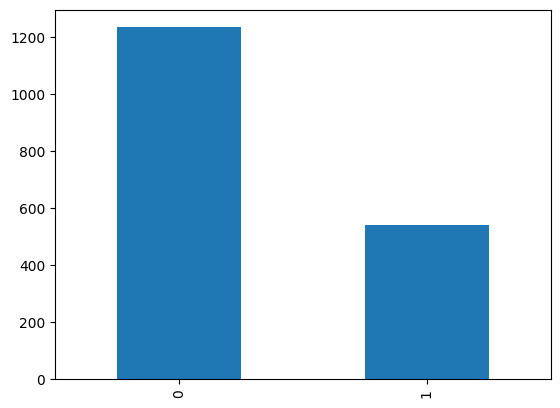

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Heart_Stroke.value_counts())
df.Heart_Stroke.value_counts().plot.bar()

0    1028
1     275
2     242
3     145
4      83
Name: Brain_tumor, dtype: int64


<Axes: >

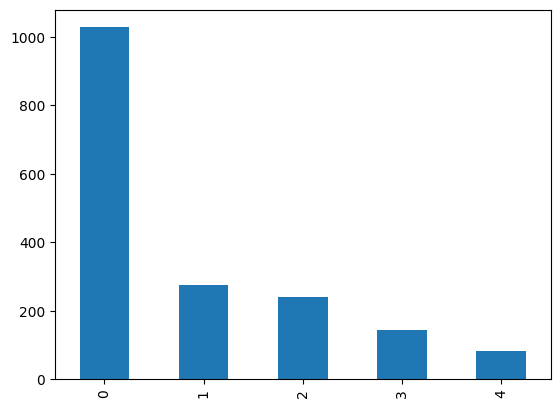

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Brain_tumor.value_counts())
df.Brain_tumor.value_counts().plot.bar()

1    1038
0     735
Name: Brain_Injuries, dtype: int64


<Axes: >

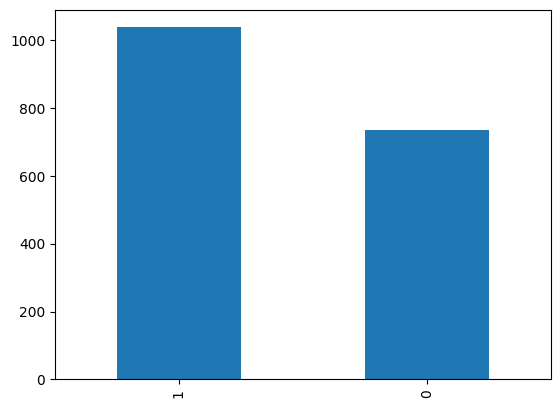

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Brain_Injuries.value_counts())
df.Brain_Injuries.value_counts().plot.bar()

1    1244
0     529
Name: Frequent_consumption_of_junkfood, dtype: int64


<Axes: >

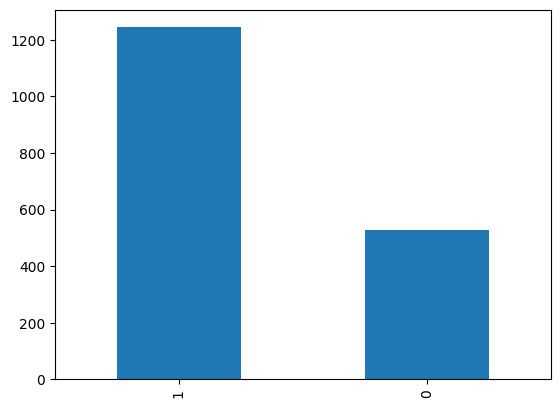

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Frequent_consumption_of_junkfood.value_counts())
df.Frequent_consumption_of_junkfood.value_counts().plot.bar()

0    654
2    517
1    362
3    240
Name: Seizures_time_Duration, dtype: int64


<Axes: >

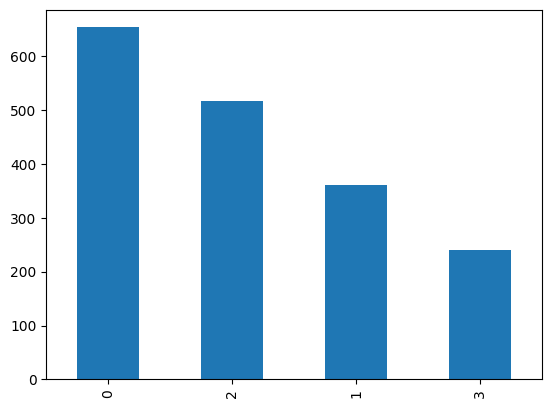

In [ ]:

# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Seizures_time_Duration.value_counts())
df.Seizures_time_Duration.value_counts().plot.bar()

1    1078
0     695
Name: Affected, dtype: int64


<Axes: >

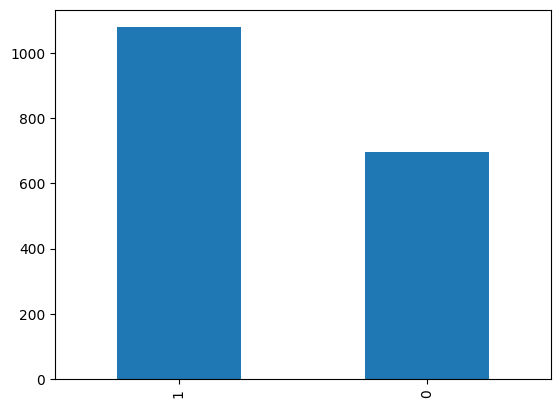

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Affected.value_counts())
df.Affected.value_counts().plot.bar()

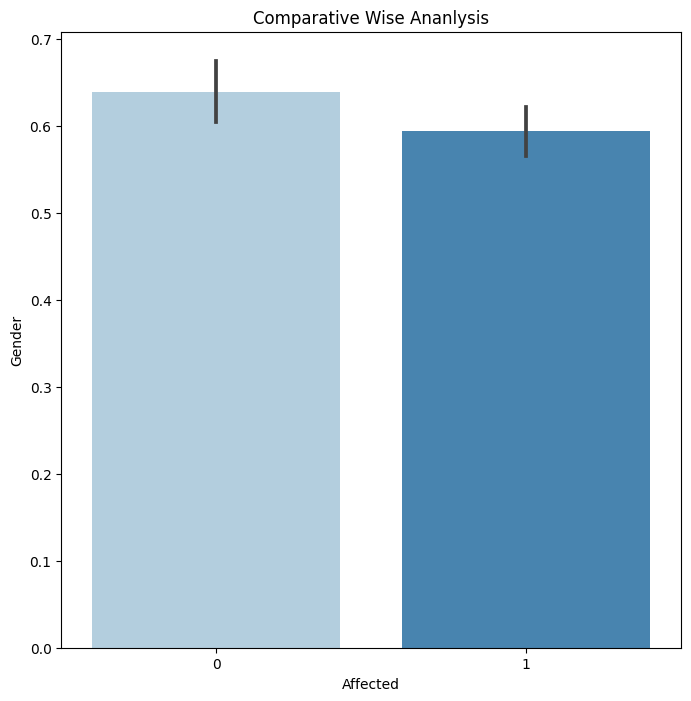

In [ ]:
#Creating bar plot using seaborn
import seaborn as sns
plt.figure(figsize=(8,8))

sns.barplot(x = 'Affected',y = 'Gender',data = df,palette = "Blues")
#Adding the aesthetics
plt.title('Comparative Wise Ananlysis')
plt.xlabel('Affected')
plt.ylabel('Gender')
# Show the plot
plt.show()

0 1


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

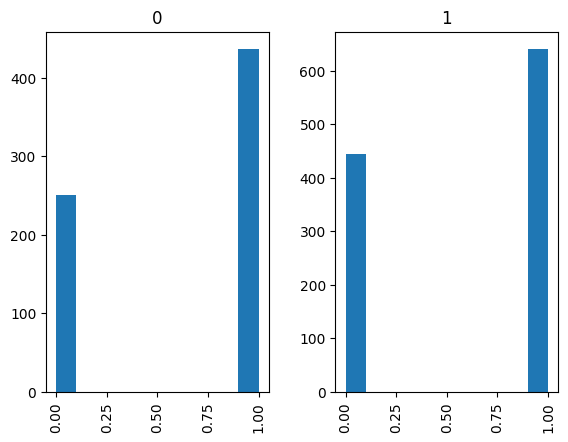

In [ ]:
# Visualize distribution of Affected along with Gender using Histogram
print(df.Affected.min(),df.Affected.max())
df.hist(column="Affected",by="Gender",bins=10)

<Axes: xlabel='Age', ylabel='Affected'>

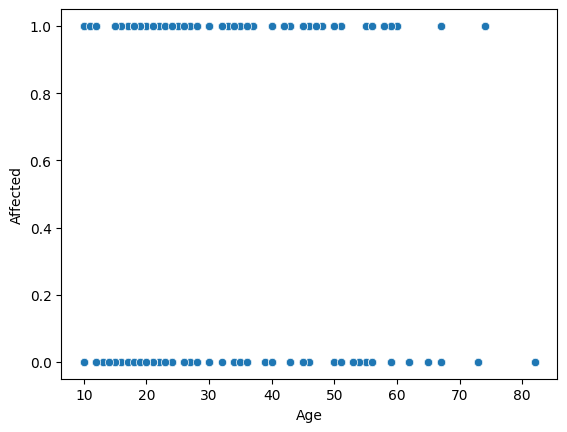

In [ ]:
# distribution of data between Affected and Age
sns.scatterplot(y = df.Affected,x=df.Age)

<Axes: xlabel='Fever', ylabel='Brain_Injuries'>

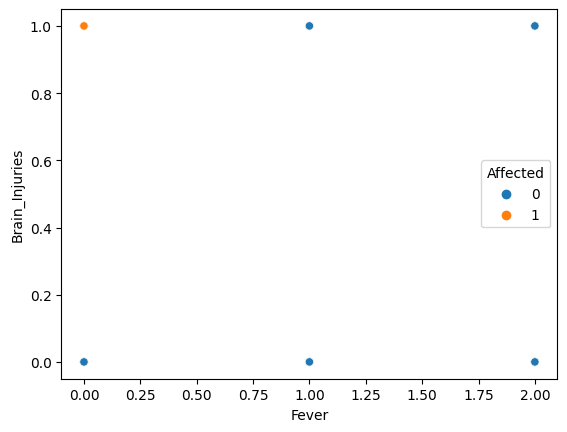

In [ ]:
sns.scatterplot(x='Fever',y = 'Brain_Injuries',hue = 'Affected',data = df)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

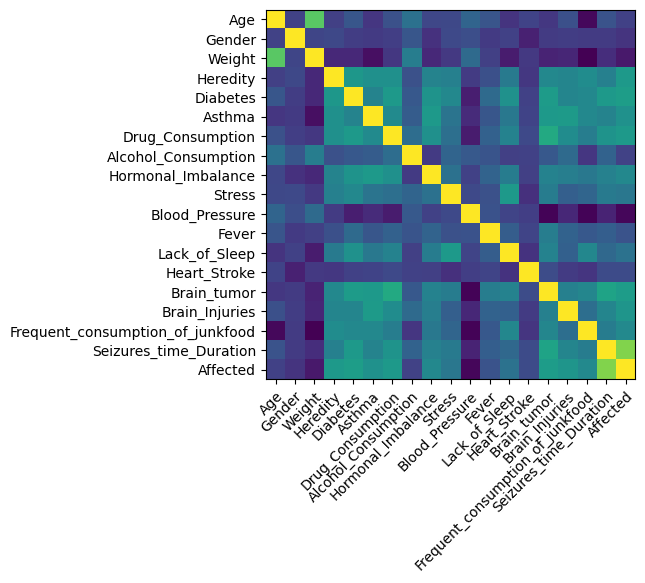

In [ ]:
# Demonstrate generation of heatmap using matplotlib
import matplotlib.pyplot as plt
import numpy as np
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)
# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

<Axes: >

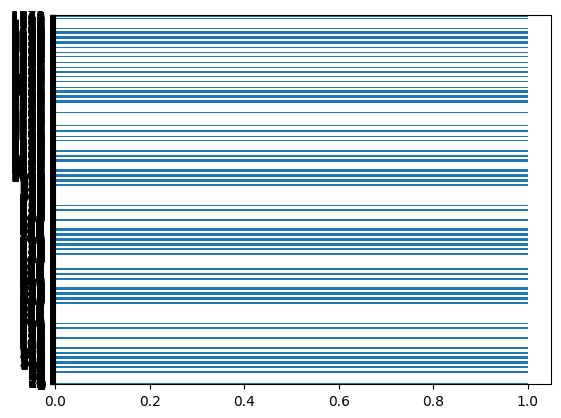

In [ ]:
# Generate bar plot in horizontal using plot available in pandas
df.Affected.plot.barh()

<Axes: >

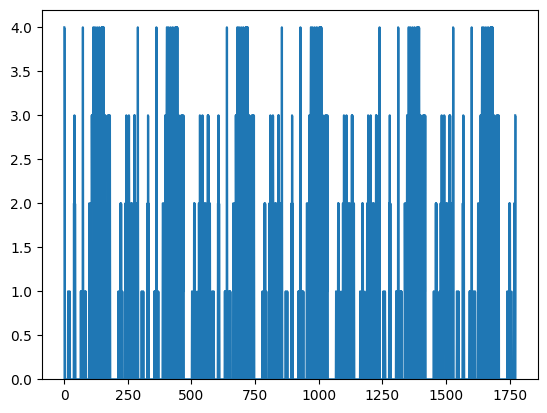

In [ ]:
# Generate area plot using plot available in pandas
df.Brain_tumor.plot.area()

<Axes: >

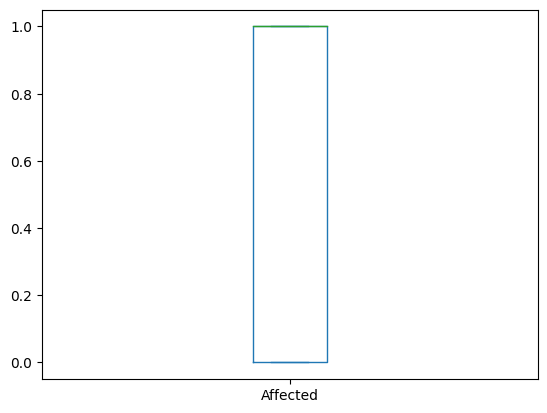

In [ ]:
# Generate box plot for Fits columnn
df.Affected.plot.box()

<Axes: ylabel='Density'>

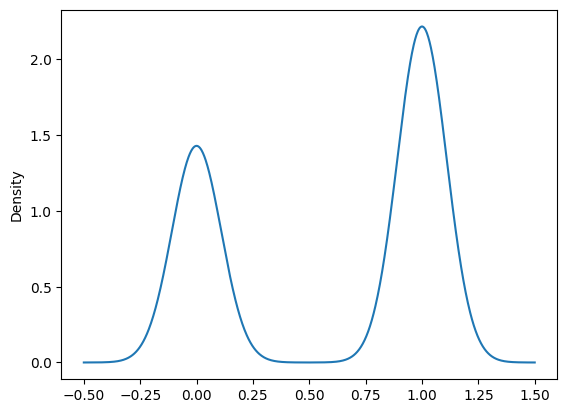

In [ ]:
# Generate density plot for Affected columnn
df.Affected.plot.density()

<Axes: ylabel='Density'>

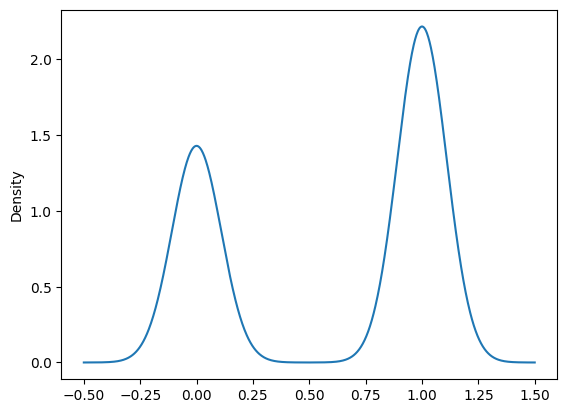

In [ ]:
# Generate kernel density estimation plot for Affected columnn
df.Affected.plot.kde()

<Axes: >

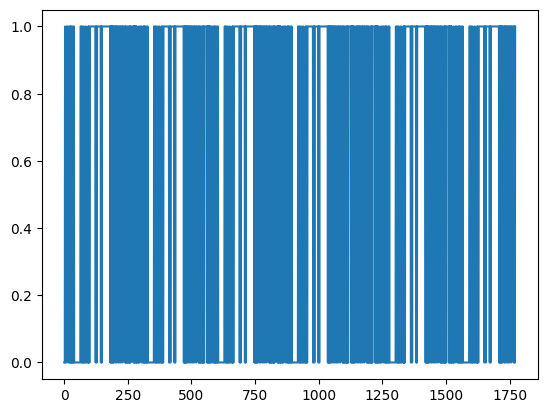

In [ ]:
# Generate line plot for Brain_Injuries columnn
df.Brain_Injuries.plot.line()

<Axes: >

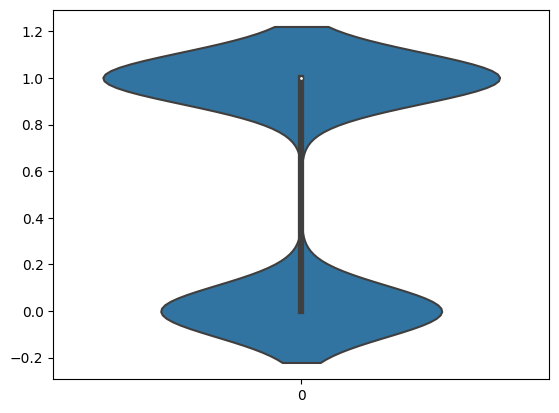

In [ ]:
#violin plot(it shows several quantitative data across one or more categorical variables)
sns.violinplot(data=df.Brain_Injuries)

<Axes: ylabel='count'>

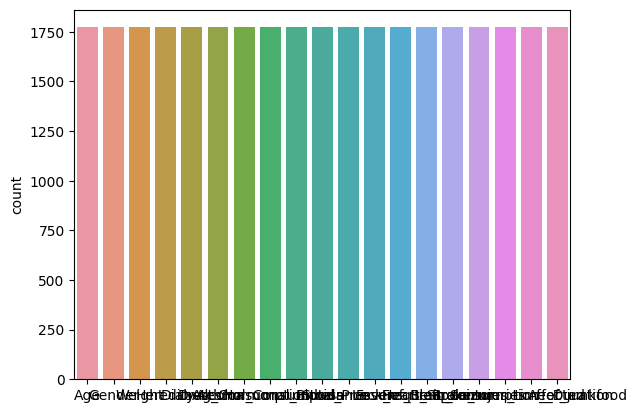

In [ ]:
sns.countplot(data=df)

<Axes: >

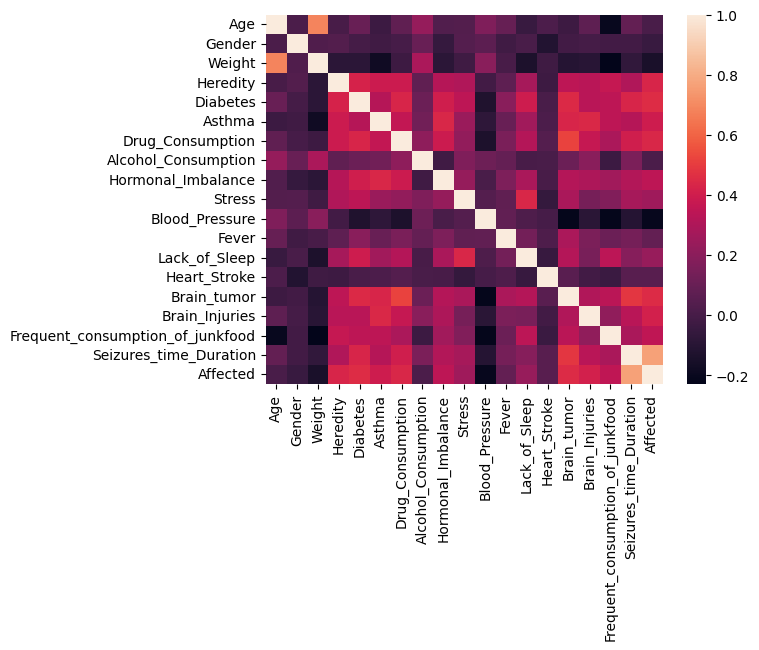

In [ ]:
sns.heatmap(df.corr())

<Axes: >

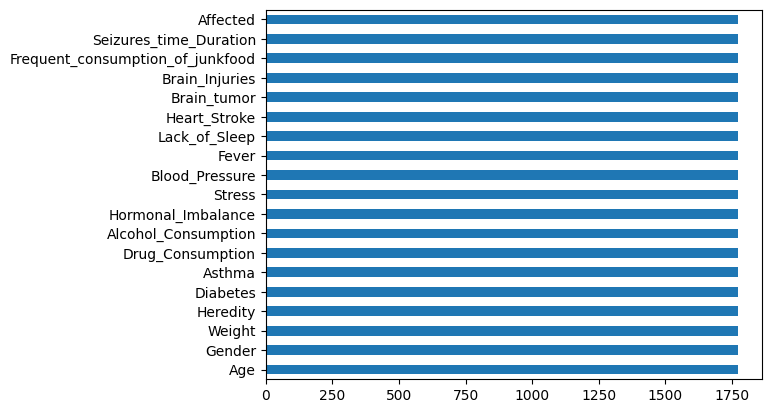

In [ ]:
# generate bar chart in horizontal way for entire dataset
df.count().plot.barh()

# Data Exploration

In [ ]:
#Apply the Fivethirtyeight style to all plots
plt.style.use("fivethirtyeight")

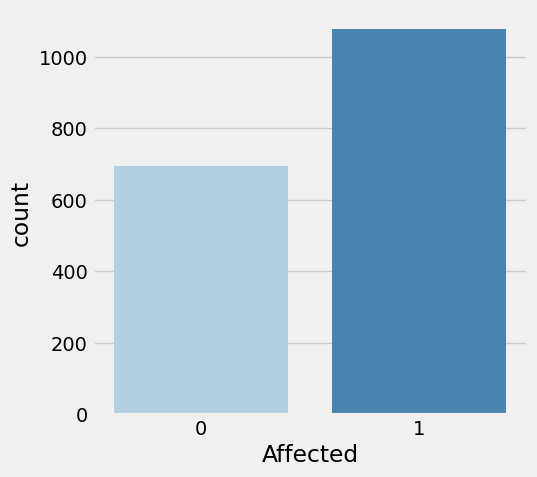

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Affected'],palette="Blues",linewidth=1)
plt.show()

The plot shows a class imbalance of the data between Affected and non-Affected. To address this, resampling would be a suitable approach. To keep this case simple, the imbalance is kept forward and specific metrics are chosen for model evaluations.



In [ ]:
#Create a function to generate boxplots
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,256]}
def boxplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))
  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.boxplot(x=x,y=j,data=df[[x,j]],palette="Blues",linewidth=1)
    ax.set_title(j)
  return plt.show()

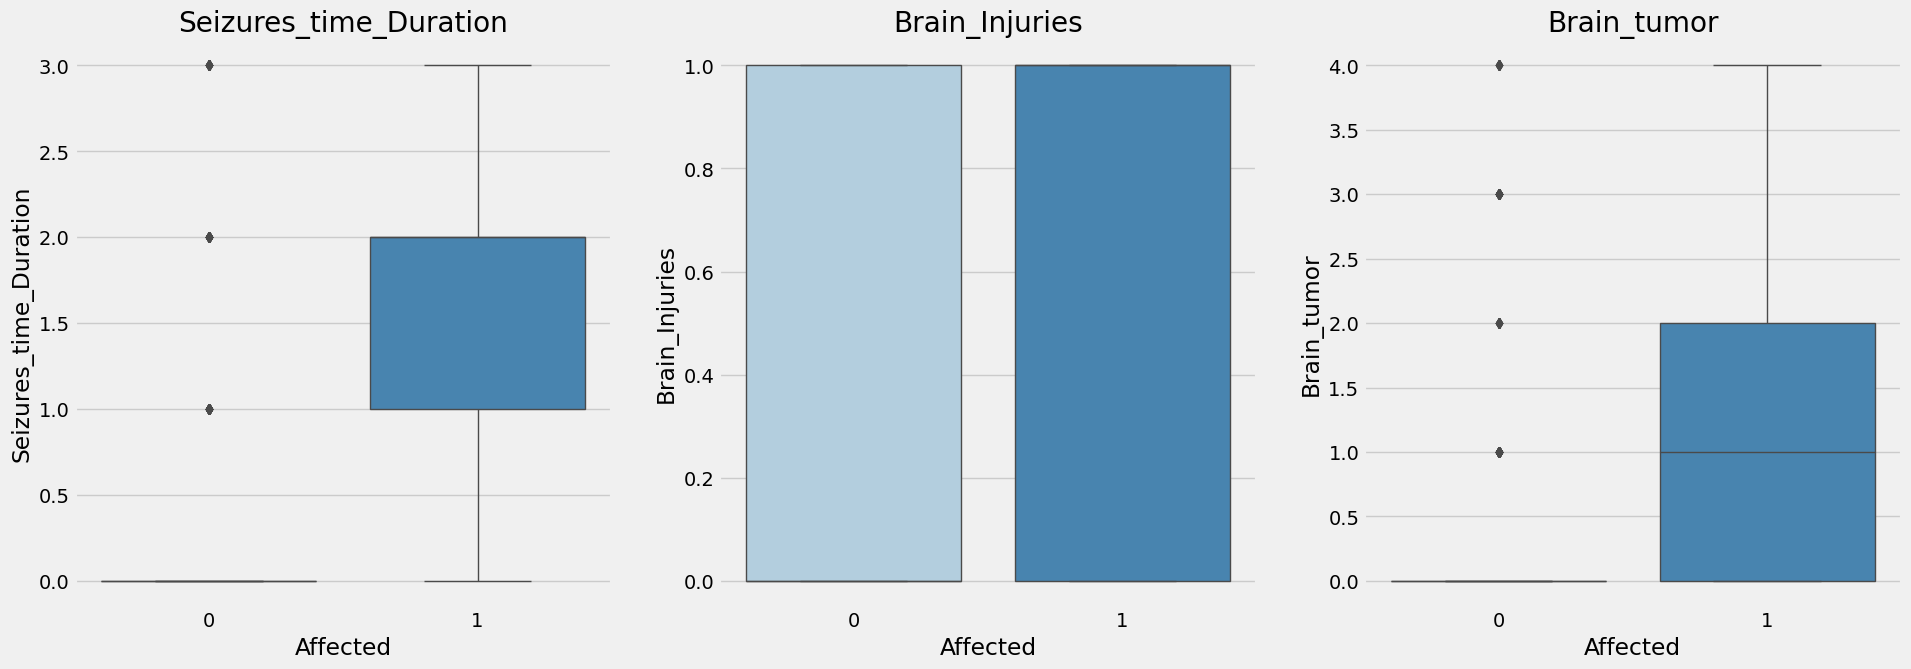

In [ ]:
#Generate boxplts for Fits_time_Duration,Brain_Injuries and Brain_tumor
boxplot("Affected",["Seizures_time_Duration","Brain_Injuries","Brain_tumor"],df)

In [ ]:
#Create a function to generate countplots
def countplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.countplot(x=j,hue=x,data=df,palette='Blues',alpha=0.8,linewidth=0.4,edgecolor='black')
    ax.set_title(j)
  return plt.show


<ipython-input-67-ed470fb998ea>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(plots[len(y)][i])


<function matplotlib.pyplot.show(close=None, block=None)>

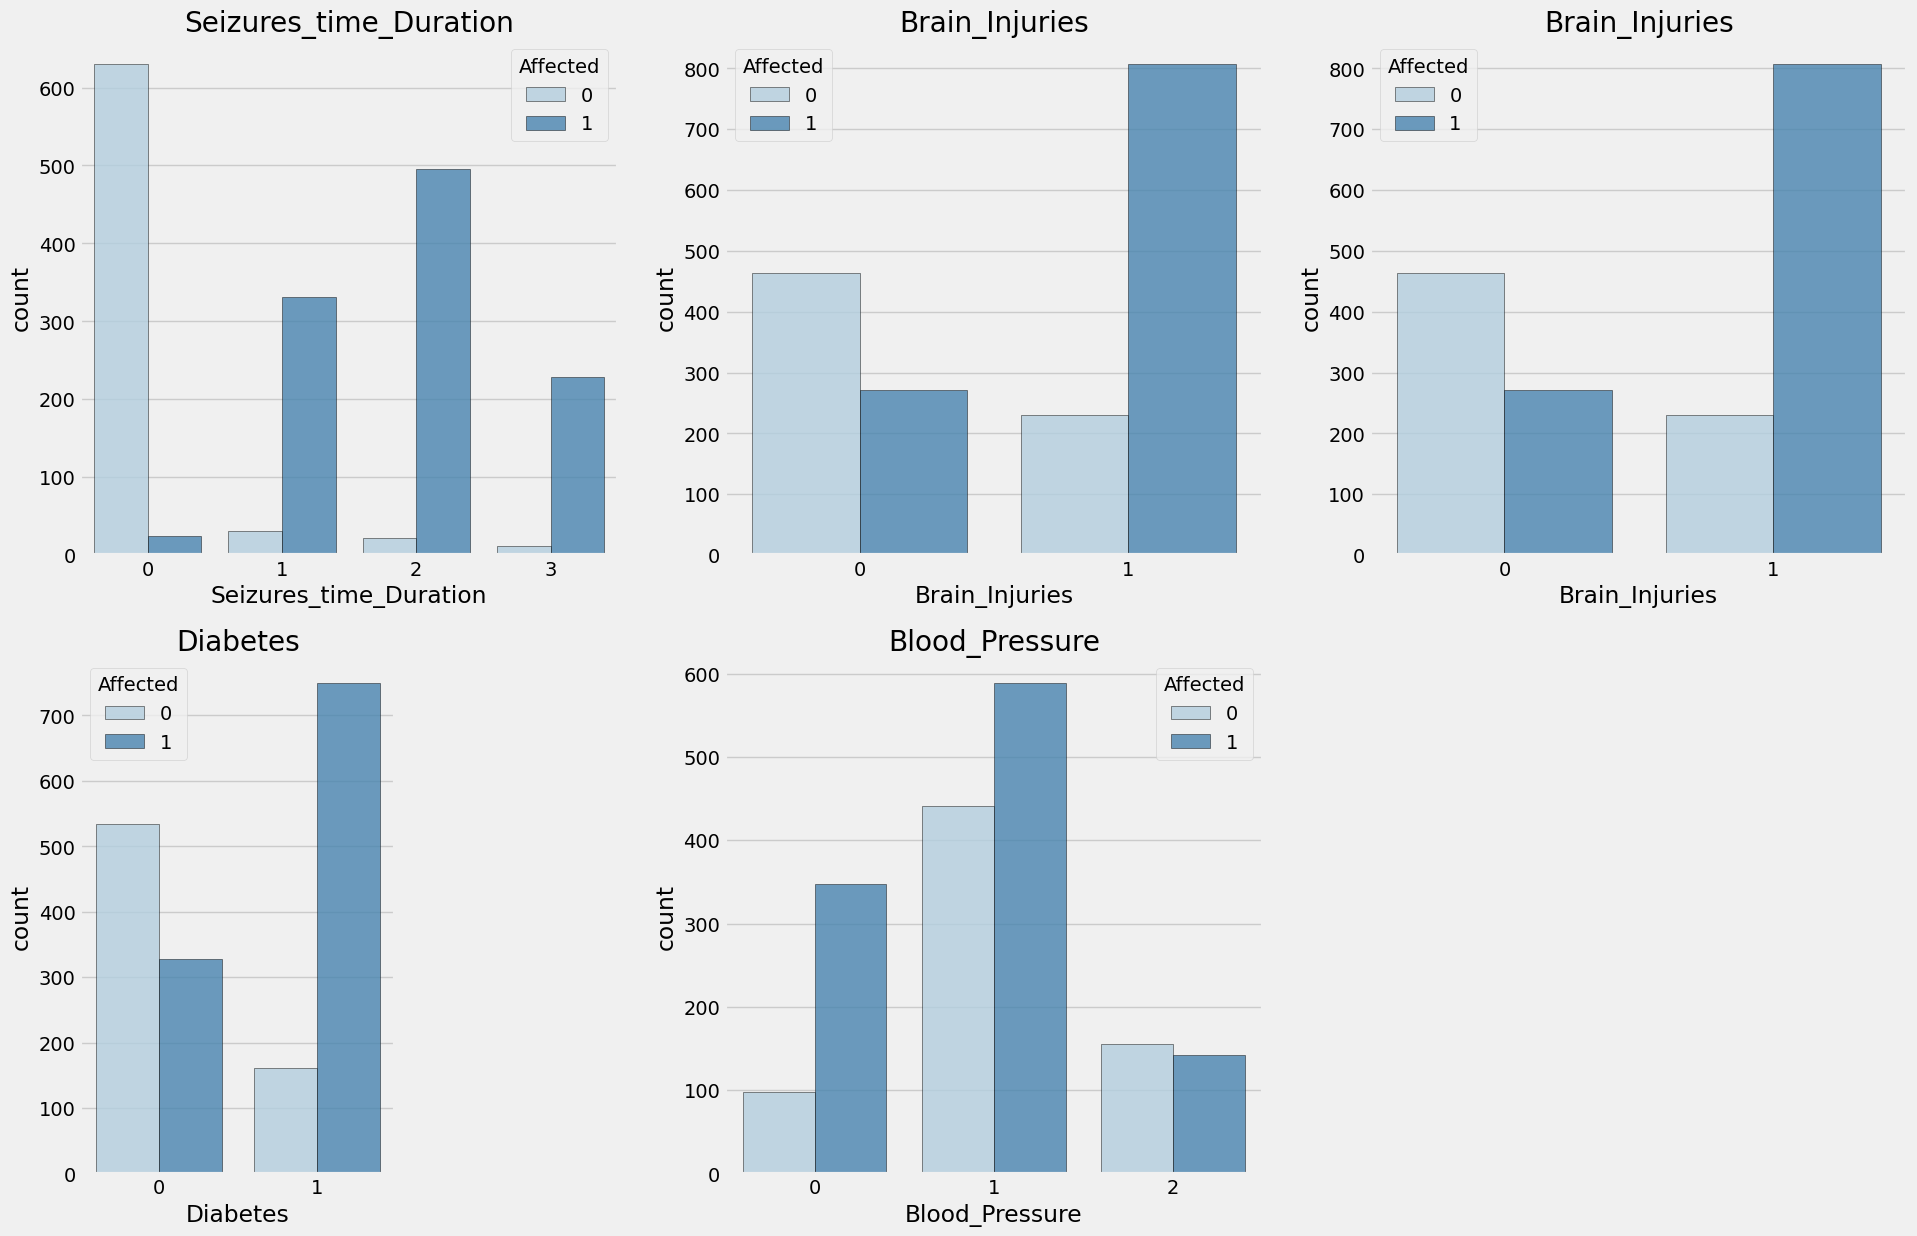

In [ ]:
#Generate countplots for various features
countplot("Affected",['Seizures_time_Duration','Brain_Injuries','Brain_Injuries','Heart_Stroke','Blood_Pressure','Diabetes'],df)

## **Check** **for** **Outliers** **in** **Numerical** **Features**

In [ ]:
#Check of outliers by applying the IQR method checking if values are way outside the IQR borders
numerical_features=["Seizures_time_Duration","Brain_Injuries","Blood_Pressure"]
df_num=df[numerical_features]
df_num.describe()

Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
IQR
((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any()

Seizures_time_Duration    False
Brain_Injuries            False
Blood_Pressure            False
dtype: bool

## Data Cleaning &Data Imputation

In [ ]:
#Drop the rows with missing values
df=df.dropna( )

# Step 5: Feature Engineering

In Feature engineering ,the steps identified are at the end of EDA are executed.
Additionally ,new feature is generated from existing features and a correaltion analysis is conducted after all features have been tranformed to numerical

# Correlation analysis

In [ ]:
df.Affected

0       1
1       1
2       1
3       1
4       1
       ..
1768    1
1769    0
1770    0
1771    0
1772    0
Name: Affected, Length: 1773, dtype: int64

<Axes: >

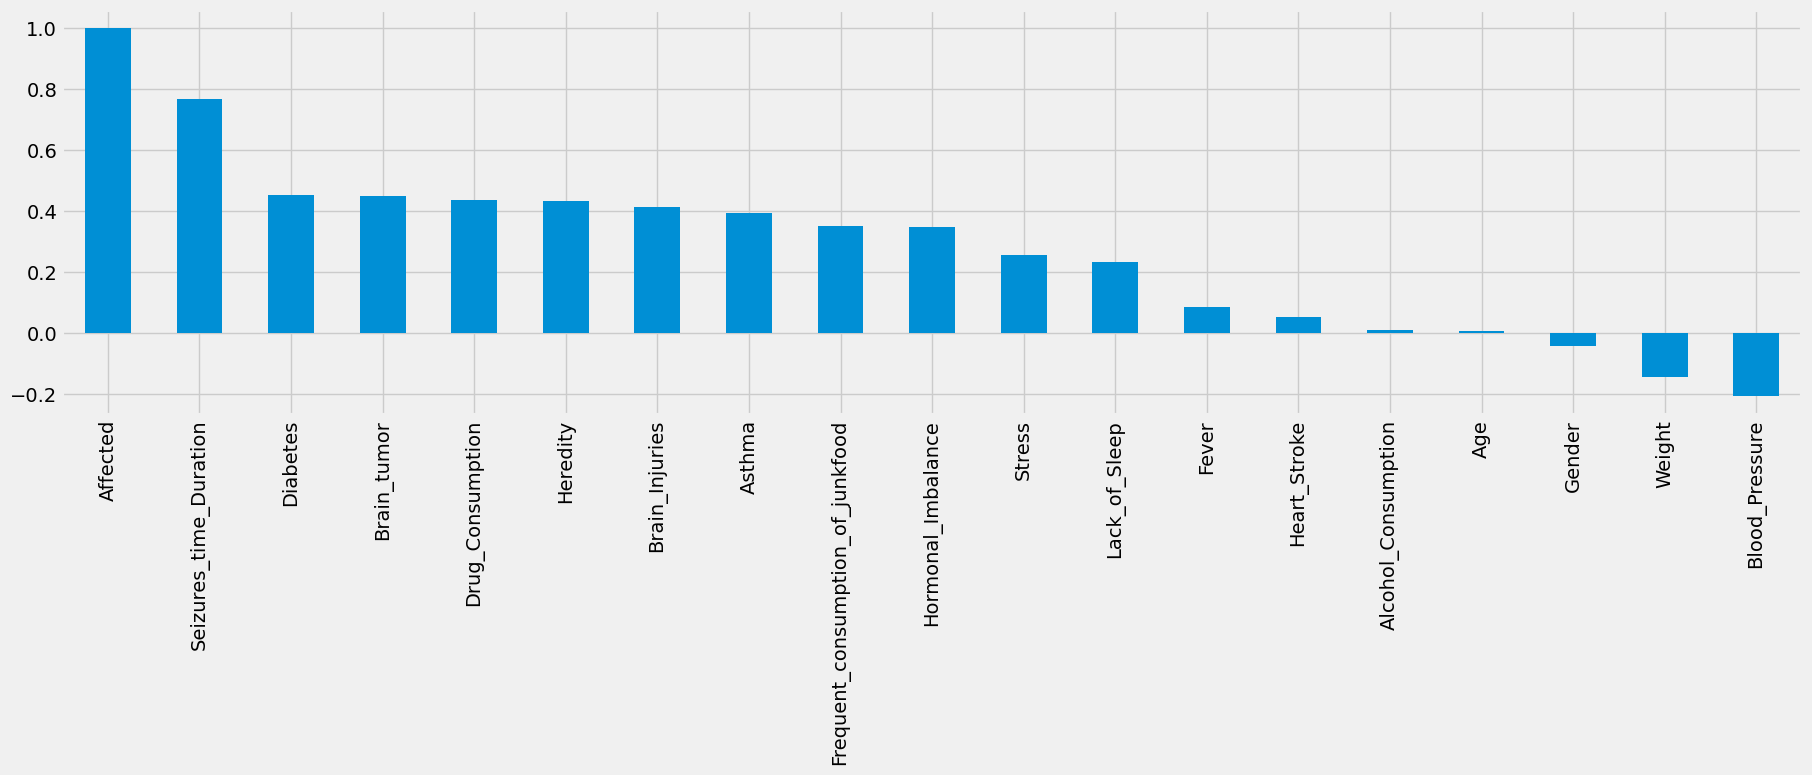

In [ ]:
#show correlation plot for correlation of Affected with each of the remaining features
plt.figure(figsize=(16,10))
df.corr()['Affected'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

#  Step 6: Train-Test-Split


For conduction of model training and testing steps, the data set is split into 70% training data and 30% test data. The “Affected” column is defined as the class (the “y”), the remaining columns as the features (the “X”).


In [ ]:
y=df.Affected.values   # values => np array
x=df.drop(["Affected"],axis=1)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
x.head()

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor,Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration
0,20,0,43,0,1,0,0,0,0,1,1,1,1,1,4,0,1,3
1,19,1,45,0,1,1,0,1,0,1,2,1,1,1,0,0,1,2
2,17,0,43,1,1,1,0,0,1,1,2,2,1,1,0,0,1,1
3,16,0,38,1,1,1,1,0,1,0,2,0,1,1,0,1,1,2
4,45,1,68,1,1,1,0,1,0,1,2,0,1,1,0,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# holding results in a list
scores_accuracy=[]

In [ ]:
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.943609022556391


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


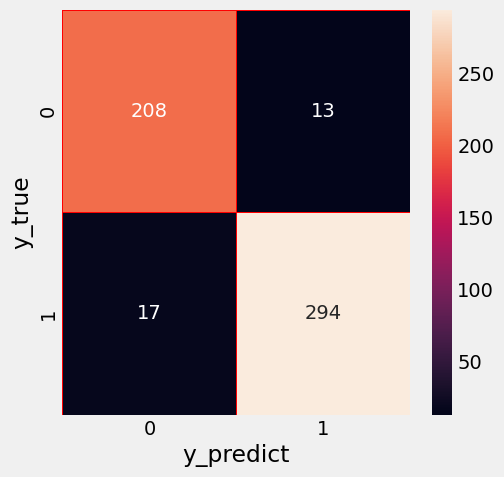

In [ ]:
# LR confusion matrix
from sklearn.metrics import confusion_matrix
y_predict = lr.predict(x_test)
y_true = y_test
cm = confusion_matrix (y_true,y_predict)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict")
plt.ylabel("y_true")
plt.show()

In [ ]:
# KNN  classification
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.8590225563909775 


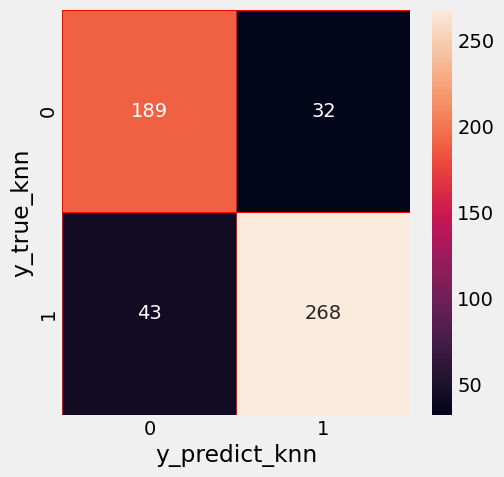

In [ ]:
# KNN confusion matrix
y_predict_knn = knn.predict(x_test)
y_true_knn = y_test
cm_knn = confusion_matrix (y_true_knn,y_predict_knn)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_knn")
plt.ylabel("y_true_knn")
plt.show()

In [ ]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.7575187969924813


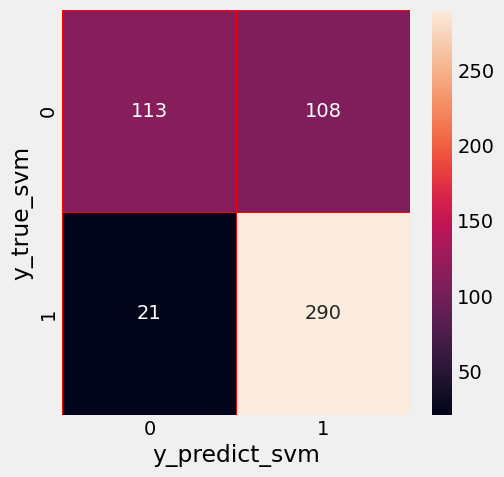

In [ ]:
# SVM confusion matrix
y_predict_svm = svm.predict(x_test)
y_true_svm = y_test
cm_svm = confusion_matrix (y_true_svm,y_predict_svm)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm_svm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_svm")
plt.ylabel("y_true_svm")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8778195488721805


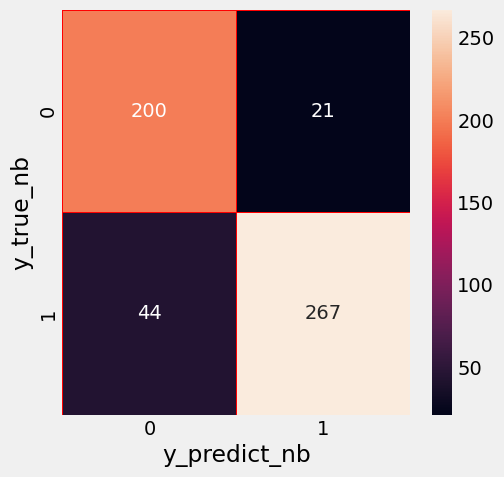

In [ ]:
# NB confusion matrix
y_predict_nb = nb.predict(x_test)
y_true_nb = y_test
cm_nb = confusion_matrix (y_true_nb,y_predict_nb)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm_nb,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_nb")
plt.ylabel("y_true_nb")
plt.show()

In [ ]:
# check score regularly
# del scores_accuracy[index] if you needed
#del scores_accuracy[1]
scores_accuracy

[['LR', 0.943609022556391],
 ['KNN', 0.8590225563909775],
 ['SVM', 0.7575187969924813],
 ['NB', 0.8778195488721805]]

In [ ]:
# Decision Tree Classification
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.9887218045112782


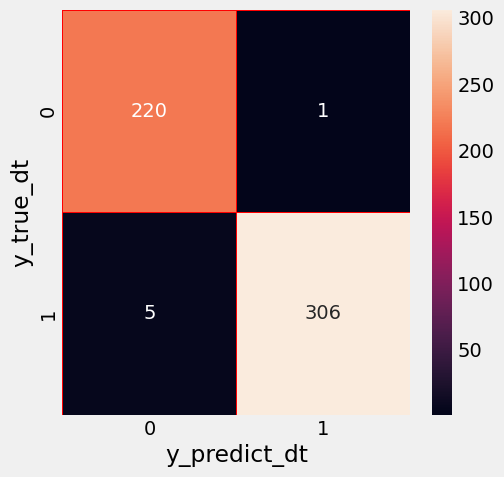

In [ ]:
# DT confusion matrix
y_predict_dt = dt.predict(x_test)
y_true_dt = y_test
cm_dt = confusion_matrix (y_true_dt,y_predict_dt)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_dt")
plt.ylabel("y_true_dt")
plt.show()

In [ ]:
# Randon Forest Classification
#Random Forest With Sklearn

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)

rf_score = rf.score(x_test,y_test)
scores_accuracy.append(["RF",rf_score])

print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.9981203007518797


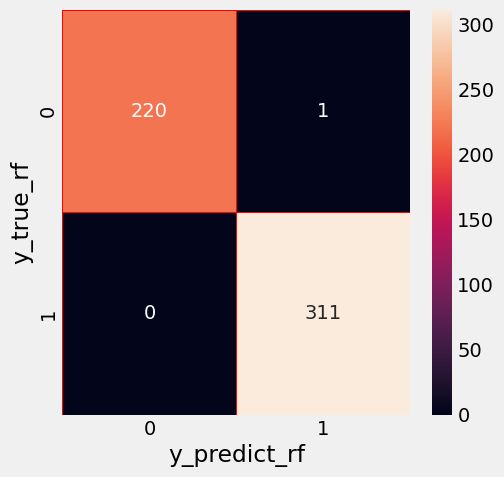

In [ ]:
# Rf confusion matrix
y_predict_rf = rf.predict(x_test)
y_true_rf = y_test
cm_rf = confusion_matrix (y_true_rf,y_predict_rf)
f, ax =plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_predict_rf")
plt.ylabel("y_true_rf")
plt.show()

In [ ]:
scores_accuracy

[['LR', 0.943609022556391],
 ['KNN', 0.8590225563909775],
 ['SVM', 0.7575187969924813],
 ['NB', 0.8778195488721805],
 ['DT', 0.9887218045112782],
 ['RF', 0.9981203007518797]]

## **Comparison Of Classification Models Accuracy**

*   Logistic Regression Classification
*   KNN Classification
*   SVM Classification
*   Naive Byes Classification
*   Decision Tree Classification
*   Random Forest Classification


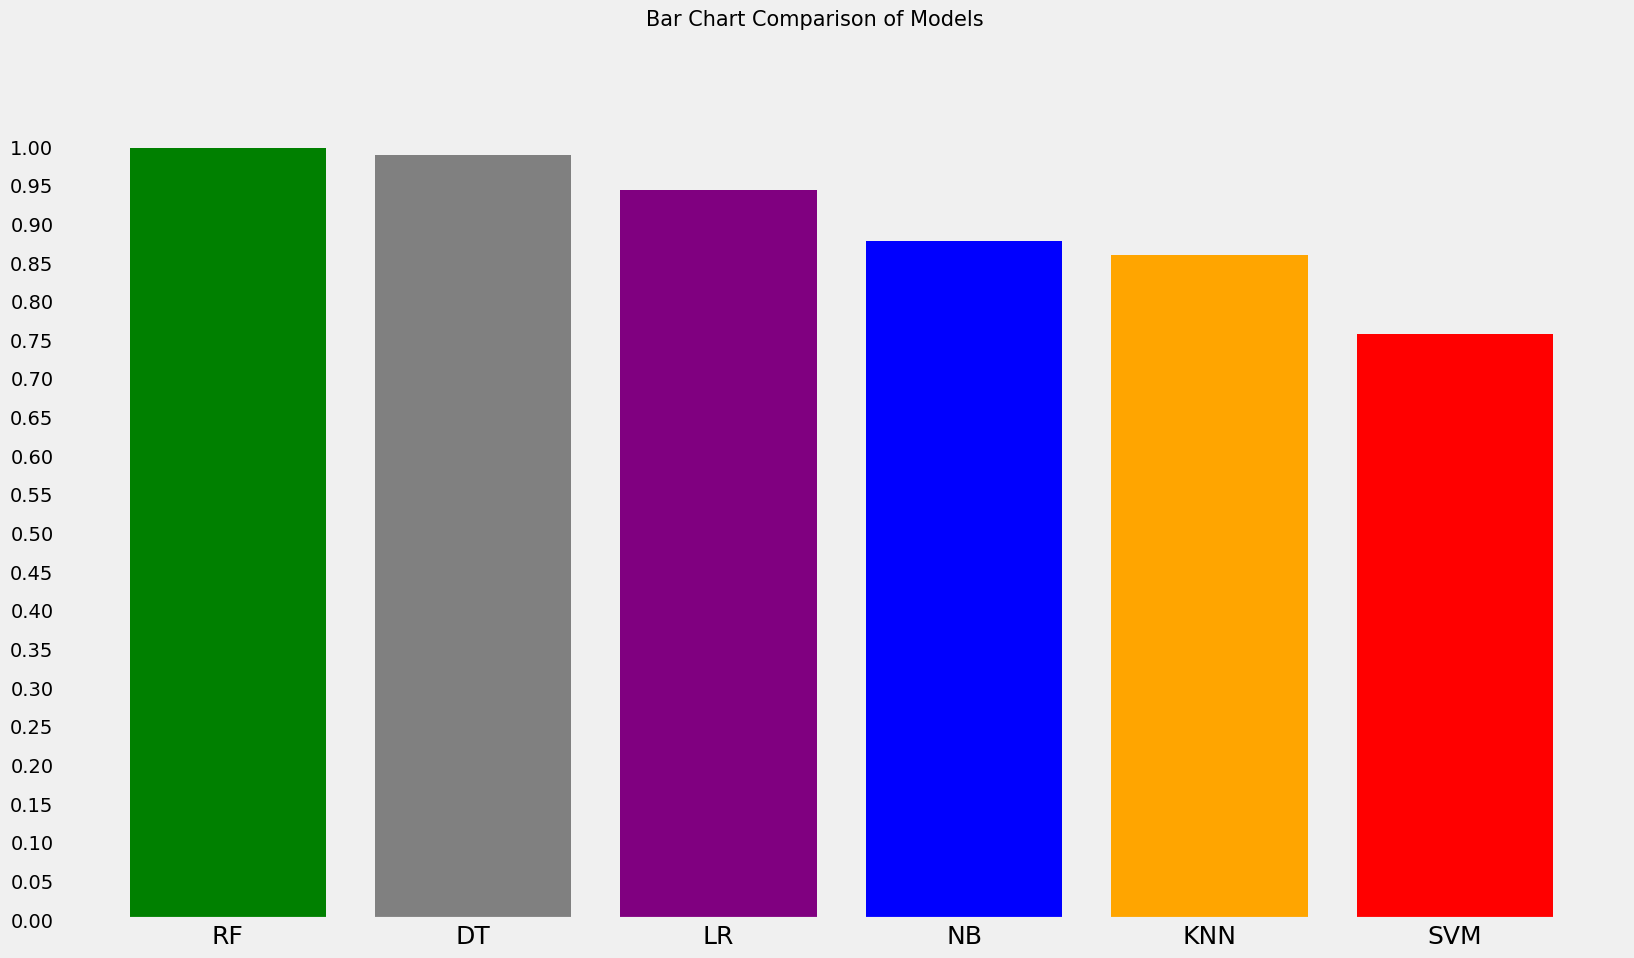

In [ ]:
algorithms=("RF","DT","LR","NB","KNN","SVM")
scores = (rf_score,dt_score,lr_score,nb_score,knn_score,svm_score)
y_pos = np.arange(1,7)
colors = ("green","gray","purple","blue","orange","red")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

Using RandomForestClassifier we able to increase the accuracy on test data to almost 99.81%. Clearly, RandomForestClassifier is a winner among all other techniques.

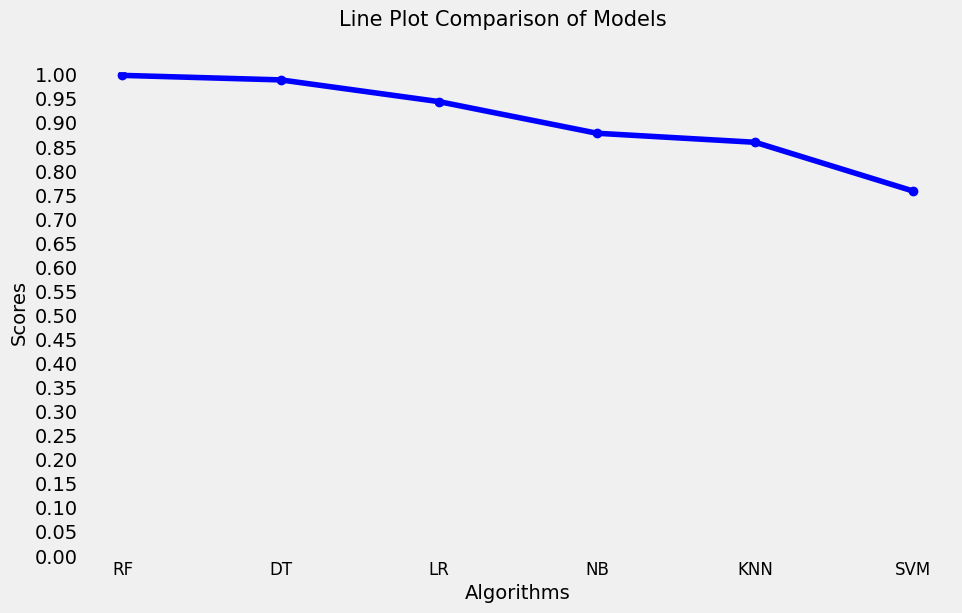

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ("RF", "DT", "LR", "NB", "KNN", "SVM")
scores = (rf_score, dt_score, lr_score, nb_score, knn_score, svm_score)
y_pos = np.arange(1, 7)
colors = ("green", "gray", "purple", "blue", "orange", "red")

plt.figure(figsize=(10, 6))  # Adjust the figure size here (width, height)

plt.plot(y_pos, scores, marker='o', linestyle='-', color='b')

plt.xticks(y_pos, algorithms, fontsize=12)  # Adjust font size
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Line Plot Comparison of Models", fontsize=15)
plt.xlabel("Algorithms", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.show()
